In [610]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from pydataset import data
import env



## Exercises

Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

Use the iris database to answer the following questions:





1. What does the distribution of petal lengths look like?


In [611]:
# sns.get_dataset_names()


In [612]:
iris=sns.load_dataset('iris')


In [613]:
iris.describe(include='all')


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: petal_length
Non-Null Count  Dtype  
--------------  -----  
150 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB


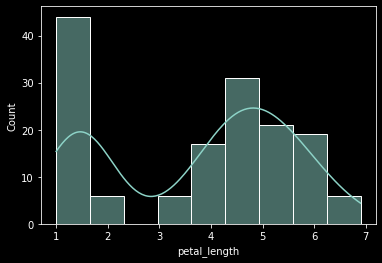

In [614]:

iris.petal_length.info()
sns.histplot(iris.petal_length, kde=True)
plt.show()

2. Is there a correlation between petal length and petal width? Use [http://guessthecorrelation.com/]
(http://guessthecorrelation.com/) as a hint to how we could visually determine if a correlation exists between two numeric columns.


Text(2, 2, 'r val: 0.96\n\np val: 0.93\n')

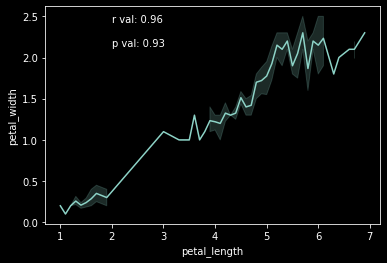

In [615]:
def randp_vals(x, y):
     p=sp.stats.pearsonr(x, y)[0]** 2
     r=sp.stats.pearsonr(x, y)[0]
     returnstring= f'r val: {r:.2f}\n\np val: {p:.2f}\n'
     return returnstring

x_var='petal_length'
y_var='petal_width'

sns.lineplot(data= iris,x=x_var, y=y_var)
corvals=randp_vals(iris[x_var], iris[y_var])
plt.text(2,2,corvals)


3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.


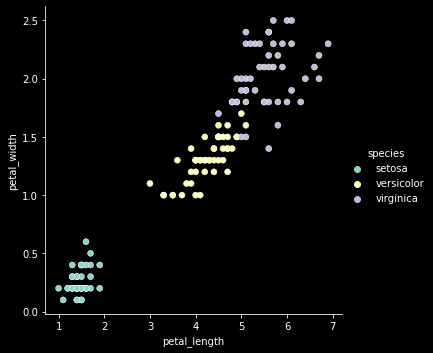

In [616]:
sns.relplot(x=x_var, y=y_var, hue='species', data=iris)


Assuming this data is representative of the population at large then it seems likely.

4. Which features would be best used to predict species? 




In [617]:
from itertools import combinations
vals = [p for p in combinations([	'sepal_length',	'sepal_width',	'petal_length',	'petal_width'],2)]
xvals=[]
yvals=[]
for v in vals:
    xvals.append(v[0])
    yvals.append(v[1])
   


In [618]:
iriscorr=iris.groupby('species').corr()
iriscorr=iriscorr[iriscorr<1]
iriscorr.style.highlight_max(axis=0,color='green')

---





1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice? \
Plot the x and y values from the anscombe data. Each dataset should be in a separate column.



https://en.wikipedia.org/wiki/Anscombe's_quartet

In [619]:
anscombe=sns.load_dataset('anscombe')
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [620]:
anscombegrouped=anscombe.groupby('dataset')


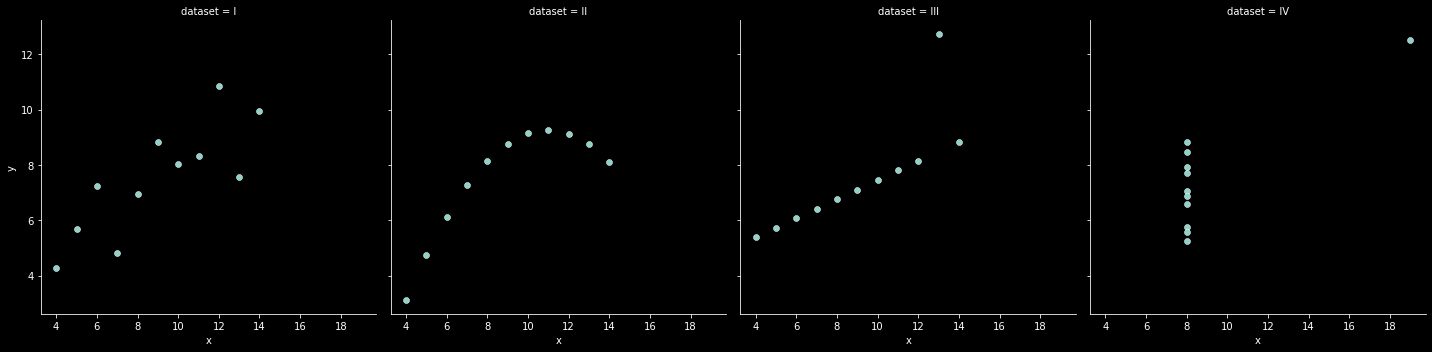

In [621]:
sns.relplot(data=anscombe,
          x='x',
          y='y',
          col='dataset'# The col is waht does this
          )
## note th

2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.


In [622]:
data('InsectSprays',show_doc='True') ## got to here on my own, wasted time trying to play with correlation stuff when there is a lot of built in tools.

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [623]:
insect_sprays=data('InsectSprays')

In [624]:
insect_sprays.head()


,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


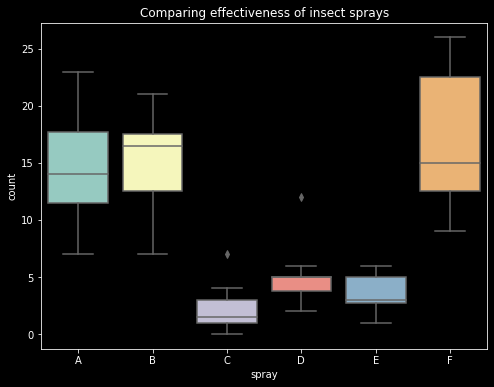

In [625]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = 'count', data = insect_sprays, x = 'spray')
plt.title('Comparing effectiveness of insect sprays')
plt.show()

3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:
    * Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
    * Does whether or not a province is Catholic influence fertility?
    * What measure correlates most strongly with fertility?


In [626]:
data('swiss',show_doc='True')
swiss=data('swiss')
swiss=pd.DataFrame(swiss)


swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [627]:
swiss.head()


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [628]:
swiss['is_catholic'] = swiss.Catholic > 50


In [629]:
swiss.head()


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

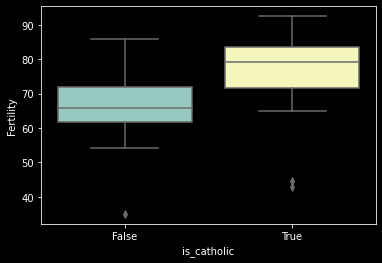

In [630]:
sns.boxplot(x= 'is_catholic', y= 'Fertility', data= swiss)


In [631]:
swiss.iloc[:, :-1]


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

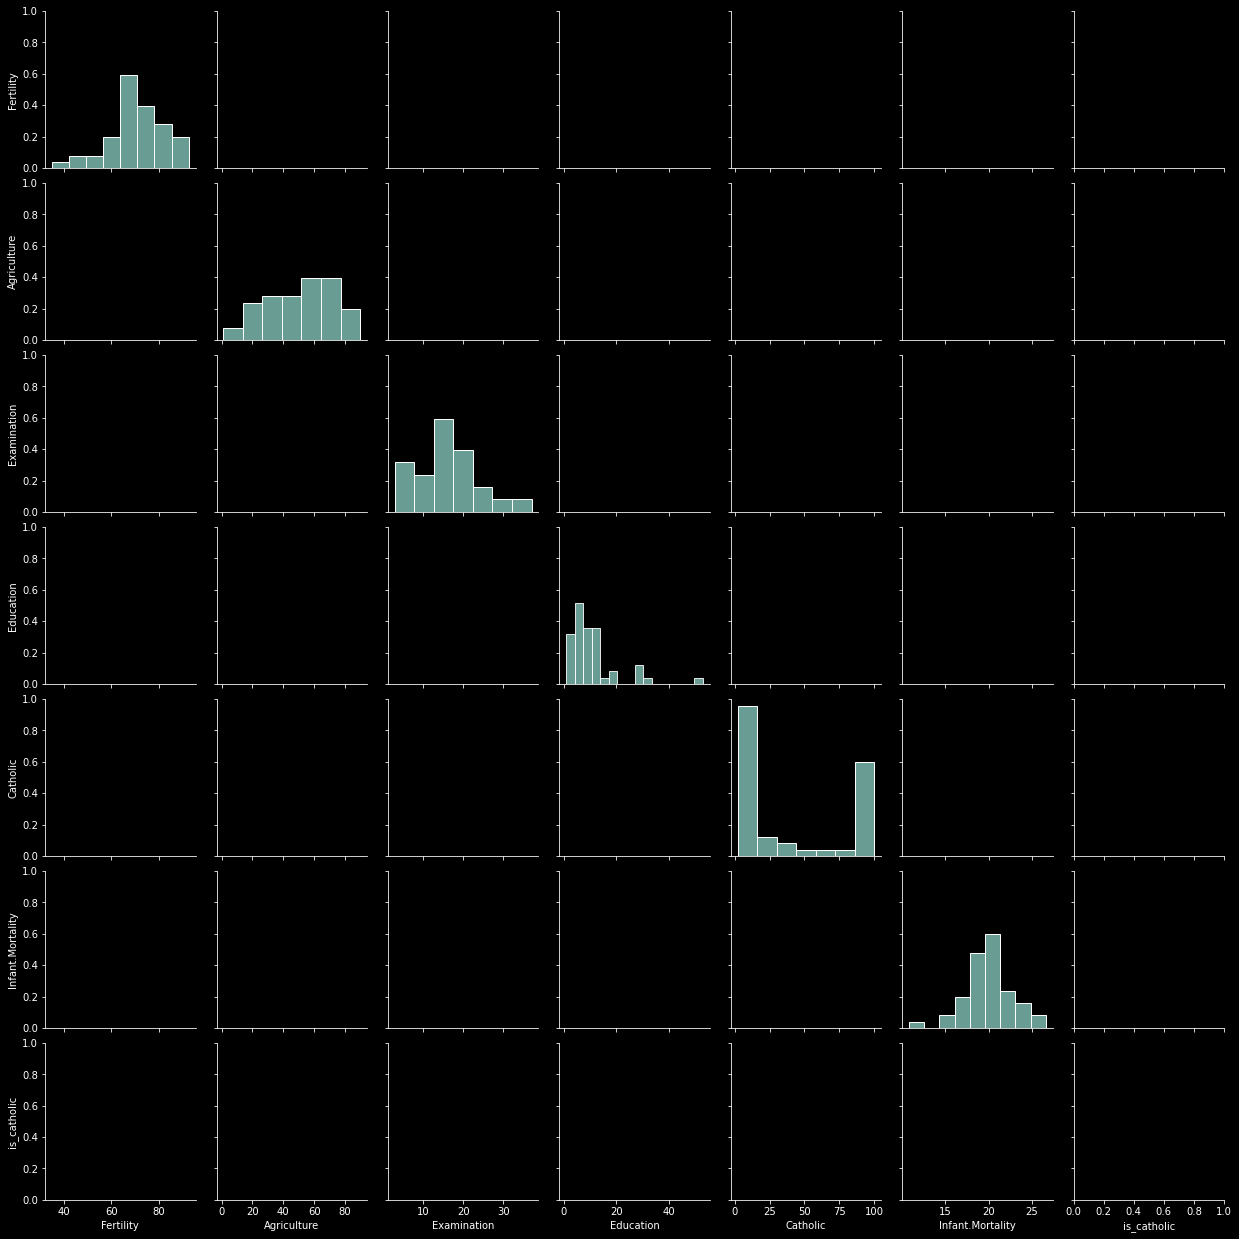

In [632]:
sns.pairplot(swiss)


In [ ]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.


In [ ]:
def get_db_url(db):
    from env import username, password, host
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'



In [634]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
orders = pd.read_sql(query, url)
orders.head()



,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [635]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [636]:
# Convert the item_price column into a float
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
orders.head(6)

# check is item price is total price or per item



/var/folders/p2/31jkjx3n3tb978006dr8dwvc0000gn/T/ipykernel_16556/2799795472.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98


In [637]:
chicken_bowl = orders[orders.item_name == 'Chicken Bowl']
chicken_bowl.sort_values('quantity', ascending = False)



,id,order_id,quantity,item_name,choice_description,item_price
409,410,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn ...",32.94
1514,1515,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",26.25
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
4435,4436,1767,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Lettuce]]",17.50
415,416,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
...,...,...,...,...,...,...
1839,1840,745,1,Chicken Bowl,"[[Roasted Chili Corn Salsa (Medium), Tomatillo-Red Chili Salsa (Hot), Fresh Tomato Sal...",8.49
1848,1849,749,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Beans, Sour Cream, Cheese]]",8.75
1851,1852,750,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour Cream, Lettuce]]",8.75
1852,1853,751,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice]]",8.75


In [638]:
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)
best_sellers



item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [639]:
best_sellers.index

# revenue produced by 4 highest selling items.



Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [640]:
revenue = orders[orders.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue



item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [641]:
orders.groupby('item_name').item_price.sum().reset_index()




,item_name,item_price
0,6 Pack Soft Drink,356.95
1,Barbacoa Bowl,672.36
2,Barbacoa Burrito,894.75
3,Barbacoa Crispy Tacos,120.21
4,Barbacoa Salad Bowl,106.40
5,Barbacoa Soft Tacos,250.46
6,Bottled Water,302.56
7,Bowl,29.60
8,Burrito,44.40
9,Canned Soda,137.34


In [642]:
best_sellers.reset_index().merge(orders.groupby('item_name').item_price.sum().reset_index(), on='item_name')



,item_name,quantity,item_price
0,Chicken Bowl,761,7342.73
1,Chicken Burrito,591,5575.82
2,Chips and Guacamole,506,2201.04
3,Steak Burrito,386,3851.43


In [643]:
revenue = revenue.sort_values(ascending = False).reset_index()
revenue



,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


Text(0.5, 0.98, 'Revenue from Top 4 selling Items')

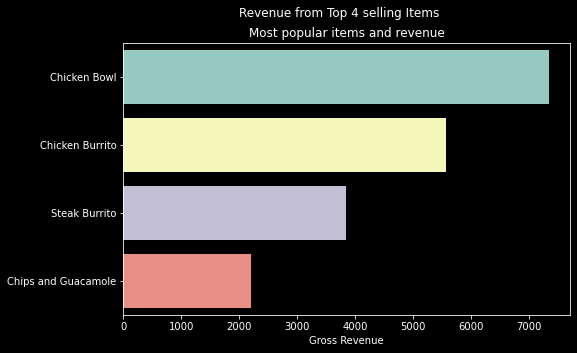

In [644]:
plt.figure(figsize = (8, 5))
sns.barplot(y = 'item_name', x = 'item_price', data = revenue)
plt.title('Most popular items and revenue')

plt.ylabel("") # to get remove the column_name
plt.xlabel("Gross Revenue")
plt.suptitle("Revenue from Top 4 selling Items")


5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominent line showing the average change in reaction time.

Text(0, 265, 'Average')

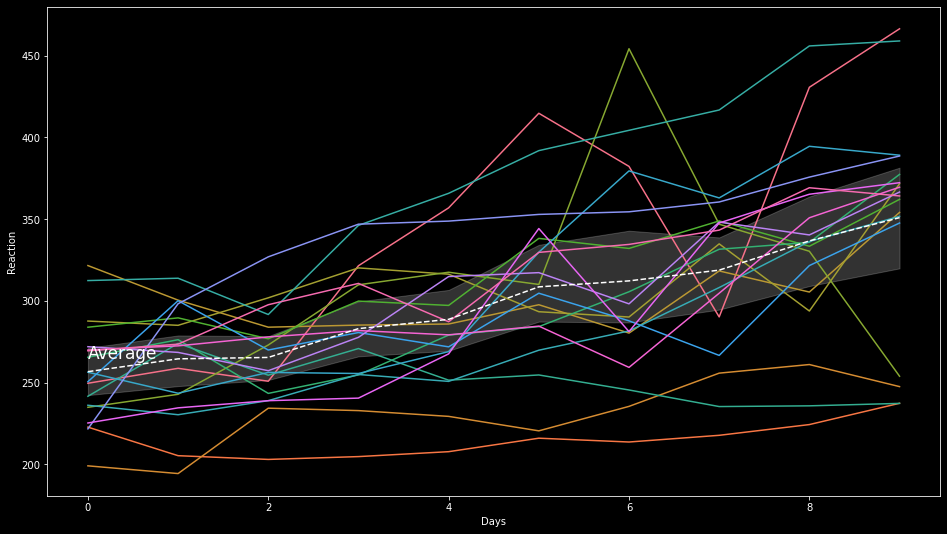

In [645]:
sleepstudy = data('sleepstudy')
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str) 

sleepstudy.head()

plt.figure(figsize=(16, 9))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject', legend=False)
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'white', linestyle='--', estimator = 'mean')# I am using a dark mode scheme so I needed white to see the line
plt.annotate('Average',(0,265),fontsize=17)
